In [109]:
# importing the required dependencies

import pandas as pd # python's library for data manipulation and preprocessing
import numpy as np  # python's library for number crunching

import matplotlib            # python's library for visualisation
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


import seaborn as sns        # also python's library for visualisations
color = sns.color_palette()
sns.set_style('darkgrid')


import sklearn                #python's machine learning library
from sklearn.model_selection import train_test_split

In [110]:
housing = pd.read_csv('housing.csv')   # reading the data into a pandas dataframe
housing.head()                         # calling the first five rows of the dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [111]:
housing.info()  # exploratory analysis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


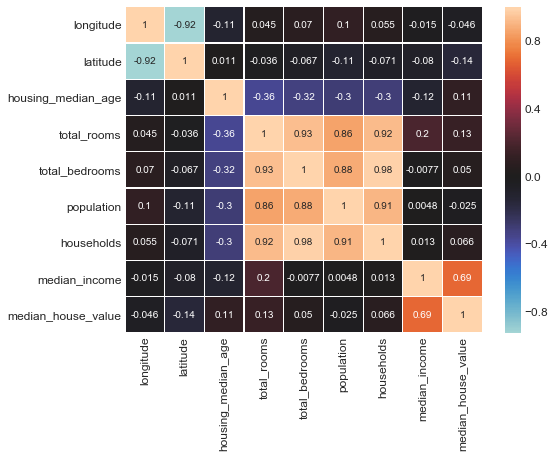

In [112]:
correlation_matrix = housing.corr()   #creating a heatmap of the attributes in the dataset
plt.subplots(figsize=(8,6))
sns.heatmap(correlation_matrix, center=0, annot=True, linewidths=.3)

In [113]:
corr = housing.corr()      # showing correlations by target variable
corr['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

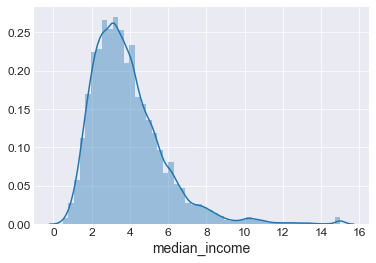

In [114]:
sns.distplot(housing.median_income) # showing the distribution of the median_income variable in the dataset
plt.show()                                  # check the distplot params though. see how you can make it prettier

##  Random Sampling method

In [115]:
train_set, test_set = train_test_split(housing, test_size=0.4, random_state=42)  # uaing the same random split value of 42 i used for stratifed sampling in the other notebook

In [116]:
housing = train_set.drop('median_house_value', axis=1)   # creating the trainset and droping the label / Target column
housing_labels =  train_set['median_house_value'].copy()
housing_labels.head()

9012     448100.0
2769      53800.0
1953     111300.0
16897    500001.0
17866    252200.0
Name: median_house_value, dtype: float64

In [123]:
rows_missing_data = train_set.isnull().any()  # checking the dataframe for missing values
train_set.isnull().sum()                       # so after splitting with random sampling. no missing row in the trainset. wow! cool

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [124]:
# creating an sklearn IMPUTER class for replacing missing values.

from sklearn.preprocessing import Imputer
# instantiate the class
imputer = Imputer(strategy='median')

#since the housing dataset has a categorical column you should drop it since the imputer class
#works on only numerical or quantitative variables.

housing_num = housing.drop('ocean_proximity', axis=1)
housing_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
9012,-118.63,34.11,35.0,3795.0,690.0,1521.0,653.0,5.8735
2769,-115.98,33.32,8.0,240.0,46.0,63.0,24.0,1.4688
1953,-120.78,38.74,28.0,4236.0,877.0,2008.0,881.0,2.1603
16897,-122.37,37.58,43.0,2506.0,432.0,967.0,428.0,4.7404
17866,-121.92,37.45,10.0,3937.0,1054.0,2032.0,1002.0,3.2617


In [125]:
# after dropping the categorical column the next thing is to fit the training data

imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [120]:
imputer.statistics_  # all the median values of all categories are stored in statistics_

array([-118.52  ,   34.27  ,   29.    , 2139.5   ,  437.    , 1172.    ,
        413.    ,    3.5313])

In [121]:
X = imputer.transform(housing_num) # its in an array that needs to be converted to a dataframe

In [126]:
housing_transformed = pd.DataFrame(X, columns = housing_num.columns)
housing_transformed.isnull().any() # check for missing values in columns

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
dtype: bool

## handling categoricals

In [128]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()   # we first encode the values with numbers be4 they are fed to model
housing_cat = housing['ocean_proximity']
housing_cat_enc = encoder.fit_transform(housing_cat)
housing_cat_enc
encoder.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

In [97]:
'''fromm the cell above we notice that there a only four classes and some classes are more than the others. 

this could lead to bias if its not checked. we need to create a binary category for each of the class. OneHotEnccoder
to the rescue. and OneHotEncoder can only work if we have already encoded the categorical column or columna with 
LabelEncoder.
'''

'fromm the cell above we notice that there a only four classes and some classes are more than the others. \n\nthis could lead to bias if its not checked. we need to create a binary category for each of the class. OneHotEnccoder\nto the rescue. and OneHotEncoder can only work if we have already encoded the categorical column or columna with \nLabelEncoder.\n'

### fromm the cell above we notice that there a only five classes and some classes are more than the others. this could lead to bias if its not checked. we need to create a binary category for each of the class. OneHotEnccoder to the rescue.

### And OneHotEncoder can only work if we have already encoded the categorical column or columns with LabelEncoder.

In [129]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False) #pass the sparse=false arg to output a numpy array
housing_cat_1hot = encoder.fit_transform(housing_cat_enc.reshape(-1, 1))
housing_cat_1hot

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [132]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# creating a pipeeline for all the numerical attriibutes of the dataset first
num_pipeline = Pipeline([
    ('imputer', Imputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

houaing_num_transform=(num_pipeline.fit_transform(housing_num))
houaing_num_transform

array([[ 0.47860651, -0.72429985,  0.51304094, ...,  0.08162818,
         0.40148104,  1.05726701],
       [ 1.79847097, -1.09385611, -1.63510479, ..., -1.21503062,
        -1.25751632, -1.26820225],
       [-0.59222692,  1.44158054, -0.04388573, ...,  0.51473712,
         1.00283462, -0.90312359],
       ...,
       [ 0.60312203, -0.76172327,  0.59260189, ...,  0.29062325,
         0.06915407, -0.49443611],
       [-1.17994015,  0.89894096, -1.07817812, ...,  0.30929941,
         0.15355457,  0.97580405],
       [-1.4090487 ,  0.98782158,  1.86557714, ...,  1.05812432,
         1.95497778, -0.683918  ]])

In [133]:
from sklearn.base import BaseEstimator, TransformerMixin

# so whats happening here is that i want to pass my dataframe to the pipeline i created earlier to fully automate the
#the process, so i create a custom transformation below that accepts the numerical values of the dataset still in df 
# form and coverts it to a numPy array since Scikit-Learn doesn't handle DataFrames yet

# dataframeselector would also make it poossible for u to select the categorical or numerical columns and which
# to pass into the dataframe.

#its still a process as i would still have to create a transformer for the categorical attributes too. and then combine
# those transformers later using sklearns FeatureUnion class

class DataFrameSelector(BaseEstimator, TransformerMixin):   #search on what these two does and how they work
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [137]:
num_attribs = list(housing_num)   # selecting only the numerical features
cat_attribs = ["ocean_prox"]       # selecting only the categorical features

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', Imputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])


housing['ocean_prox'] = housing_cat_enc          # this part is dicey, i added the numerical column and dropped the categorical column
model_housing = housing.drop('ocean_proximity', axis=1)

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('one_hot_encoder', OneHotEncoder(sparse=False)),
    ])

housingprep= cat_pipeline.fit_transform(model_housing)
housingprep

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [102]:
# combining the categorical and numerical pipeline together using FeatureUnion
from sklearn.pipeline import FeatureUnion
full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [103]:
final_housing = full_pipeline.fit_transform(model_housing)   # final transformed ready for modelling
final_housing.shape                                         #  check the number of rows and columns

(12384, 13)

## Now time to Build a model with the so-called random sampling split

In [138]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(final_housing, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [148]:
# LinearRegrassion Algorithm 
#rmse = 115127
#r2 = something very unimaginable. uncomment the code to see

from sklearn.metrics import mean_squared_error, r2_score
model_predictions = lr.predict(final_housing)
mse = mean_squared_error(housing_labels, model_predictions)
rmse = np.sqrt(mse)
rmse

#r2 score
#acc = r2_score(housing_labels, model_predictions)
#acc

148926.4019357199

In [147]:
''' so i have been able to establish that stratified sampling is quite better'''

' so i have been able to establish that stratified sampling is quite better'

## Now let's check with our Randomly generated test-set

In [ ]:
# we already have a pipeline. so its just to fit and transform the test set in the pipeline. 
# this is the importance of pipeline in a machine modelling project. imagine how much time it would cost us to go over
# all the feature transformation again


In [149]:
housing_test = test_set.drop('median_house_value', axis=1)    # creating the train set(for the reserved testset)
housing_test_labels =  test_set['median_house_value'].copy()  # creating the test set((for the reserved testset))
#housing_test_labels.head()  


# we have to label encode this one. we cant use the encoded values from the testset as they are of different shapes

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()   # we first encode the values with numbers be4 they are fed to model
housing_cat = housing_test['ocean_proximity']
housing_cat_enc = encoder.fit_transform(housing_cat)
housing_cat_enc
encoder.classes_

housing_test['ocean_prox'] = housing_cat_enc
housing_test1 = housing_test.drop('ocean_proximity', axis=1)

# passing the test data to the pipeline!!

final_housing_test = full_pipeline.fit_transform(housing_test1)
final_housing_test.shape

(8256, 13)

In [150]:
# Modelling the testset data

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(final_housing_test, housing_test_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [151]:
# LinearRegrassion Algorithm 
#rmse = 69036
#r2 = 64

from sklearn.metrics import mean_squared_error, r2_score
model_predictions = lr.predict(final_housing_test)
mse = mean_squared_error(housing_test_labels, model_predictions)
rmse = np.sqrt(mse)
rmse

#r2 score
#acc = r2_score(housing_labels, model_predictions)
#acc

69256.81717860166

In [ ]:
# This is even quite better! but cannot be compared with stratified sampling split